In [107]:
from IPython.core.display import HTML
HTML("""
<style>

div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:16pt;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")


# plotting in python
  * matplotlib - used in numpy and pandas
  * seaborn
  * bokeh

In [99]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

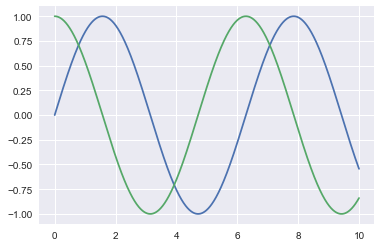

In [100]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x))

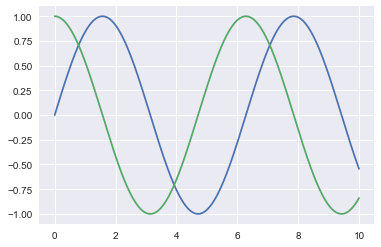

In [101]:
import seaborn as sns
sns.set()
plt.plot(x, np.sin(x), x, np.cos(x))

# Let's try some iris!



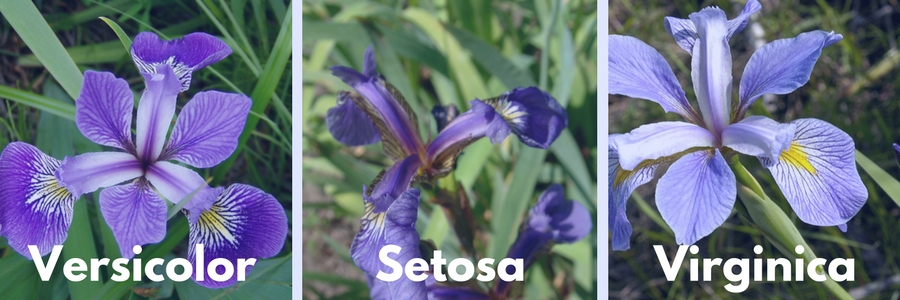

In [72]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='iris_types.jpg', width=900, height=500)

In [73]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


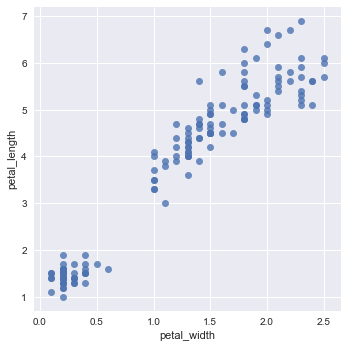

In [74]:
sns.lmplot('petal_width', 'petal_length', data=iris, fit_reg=False)

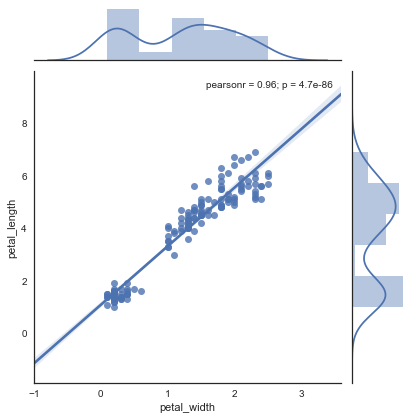

In [75]:
with sns.axes_style('white'):
    sns.jointplot('petal_width', 'petal_length', iris, kind='reg')

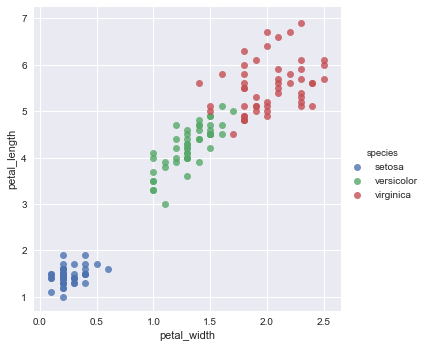

In [76]:
sns.lmplot('petal_width', 'petal_length', data=iris, hue='species', fit_reg=False)

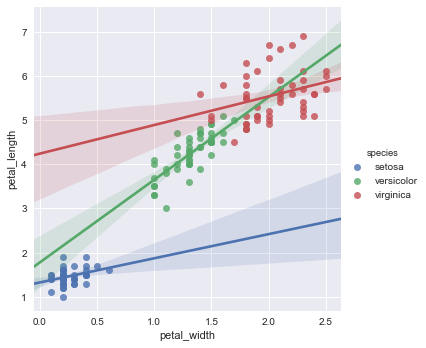

In [77]:
sns.lmplot('petal_width', 'petal_length', data=iris, hue='species', fit_reg=True)

[Text(0,0.5,'Sepal width (mm)'), Text(0.5,0,'Sepal length (mm)')]

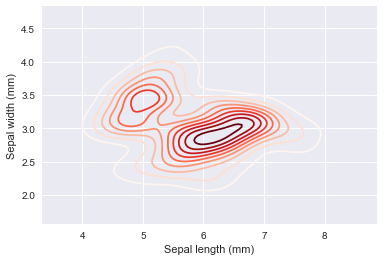

In [78]:
g2 = sns.kdeplot(iris[['sepal_length', 'sepal_width']], cmap='Reds')
g2.set(xlabel='Sepal length (mm)', ylabel='Sepal width (mm)')

In [79]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

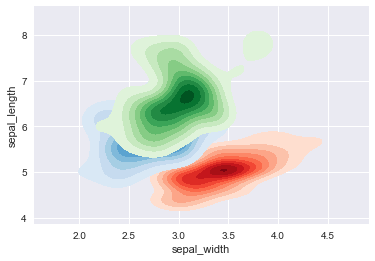

In [80]:
colourmapping = ['Reds', 'Blues', 'Greens']

for c, colour in zip(list(iris.species.unique()), colourmapping):
    ci = iris.loc[iris.species == c]
    sns.kdeplot(ci.sepal_width, ci.sepal_length, cmap=colour, shade=True, shade_lowest=False)

In [81]:
def kde_col1_col2(iris, col1, col2, axis):
    for c, colour in zip(list(iris.species.unique()), colourmapping):
        ci = iris.loc[iris.species == c]
        sns.kdeplot(ci[col1], ci[col2], cmap=colour, shade=True, shade_lowest=False, ax=axis)

In [82]:
columns = ['petal_width', 'petal_length', 'sepal_length', 'sepal_width']

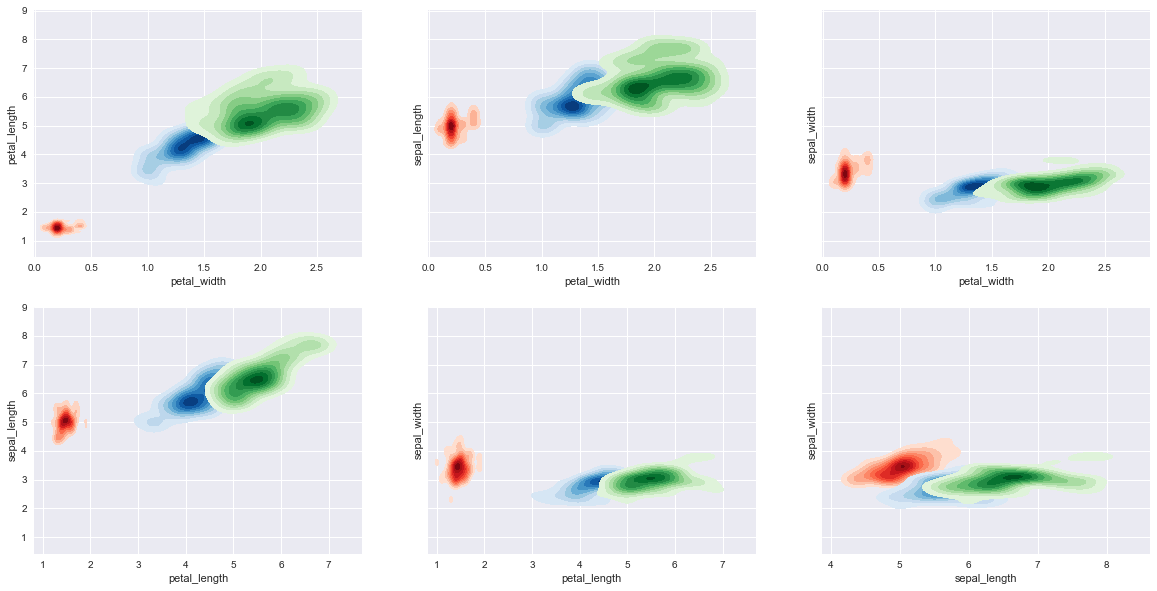

In [83]:
fig, axes = plt.subplots(ncols=3, nrows=2, sharey=True, figsize=(20,10))

ax_counter = 0
for col_ind1 in range(len(columns)):
    col1 = columns[col_ind1]
    for col_ind2 in range(col_ind1+1, len(columns)):
        axis = axes.flatten()[ax_counter]
        col2 = columns[col_ind2]
        kde_col1_col2(iris, col1, col2, axis)
        ax_counter += 1

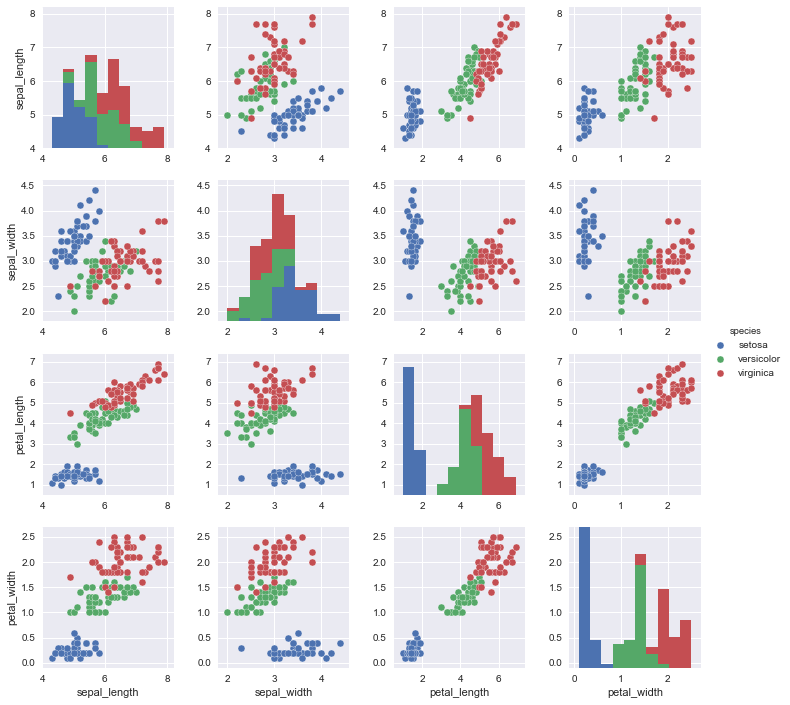

In [84]:
g1 = sns.pairplot(iris, hue='species', size=2.5)

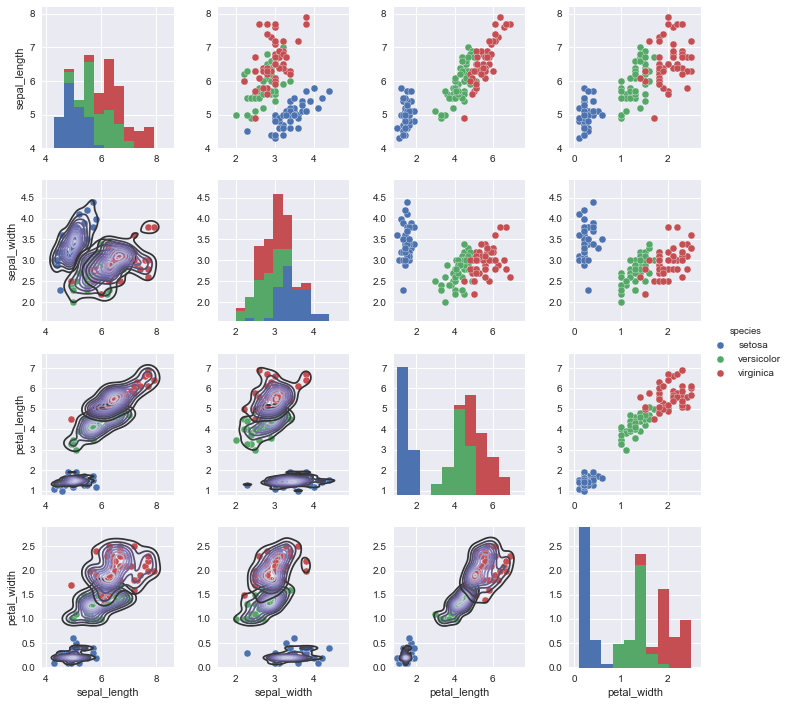

In [85]:
g1 = sns.pairplot(iris, hue='species', size=2.5)
g1.map_lower(sns.kdeplot, shade=False, cmap="Purples_d")

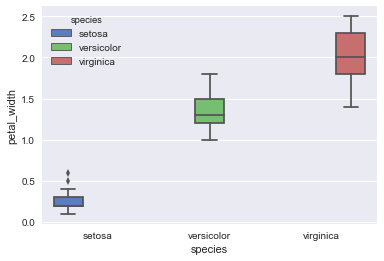

In [86]:
sns.boxplot(x='species', y='petal_width', hue='species', data=iris, 
            palette='muted')

In [87]:
iris2 = pd.melt(iris, "species", var_name="measurement")

In [88]:
iris2.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


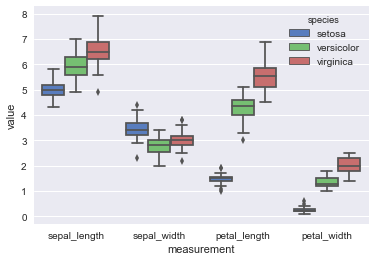

In [103]:
sns.boxplot(y='value', x='measurement', hue='species', data=iris2, 
            palette='muted')

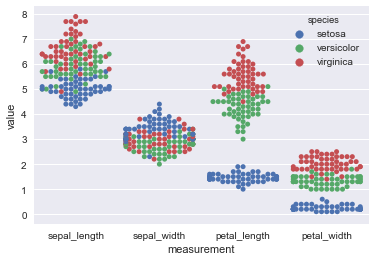

In [90]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris2)